# Принятие решений в бизнесе на основе данных

# Описание проекта

### Контекст

Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Необходимо провести приоритизацию гипотез, A/B-тест и проанализировать полученные результаты.

### Цели

- Приоритизировать гипотезы;
- Провести A/B-тест;
- Проанализировать результаты A/B-теста.

### Задачи

**Часть 1. Приоритизация гипотез**

1. Применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ А/В-теста**

1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений: 

    1) Остановить тест, зафиксировать победу одной из групп;
    
    2) Остановить тест, зафиксировать отсутствие различий между группами;
    
    3) Продолжить тест.

### Описание исходных данных

**Данные для первой части**

Таблица hypothesis:

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Таблица orders:
    
    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Таблица visitors:
    
    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

### План работы

**Часть 1**

1. Загрузим данные и подготовим их к анализу;
2. Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета;
3. Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета;
4. Изучим и укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**Часть 2**

1. Загрузим данные и подготовим их к анализу;
2. Построим график кумулятивной выручки и среднего чека по группам;
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A;
4. Построим график кумулятивной конверсии по группам;
5. Построим график относительного изменения кумулятивной конверсии группы B к группе A;
6. Построим точечный график количества заказов по пользователям и посчитаем 95-й и 99-й перцентили количества заказов на пользователя;
7. Построим точечный график стоимости заказов по пользователям и посчитаем 95-й и 99-й перцентили стоимости заказов;
8. Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным;
9. Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «очищенным» данным;
10. Примем решение по результатам теста и объясним его.

## Приоритизация гипотез

### Загрузка данных и подготовка к анализу

In [1]:
# Импортируем необходимые библиотеки для проведения анализа

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
pd.set_option('display.max_colwidth', 1)

In [2]:
# Загрузим данные для первой части проекта

hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# Приведем названия столбцов к единому формату

hypothesis.columns = hypothesis.columns.str.lower()

In [4]:
# Посмотрим на содержание всей таблицы

hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Загрузили необходимые для анализа библиотеки, применили функцию для отображения всей ширины столбца hypothesis, привели названия столбцов к единому формату. Посмотрели на содержание всей таблицы, дополнительных действий для подготовки данных для первой части не требуется.

### Применение фреймворка ICE для приоритизации гипотез

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета

In [5]:
# Проведем расчет фреймворка ICE по формуле, отсортируем по убыванию приоритета и округлим до 2 знака после запятой

hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наиболее приоритетные гипотезы по фреймворку ICE:
- "Запустить акцию, дающую скидку на товар в день рождения" - 16,20;
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" - 13,33;
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - 11,20.

### Применение фреймворка RICE для приоритизации гипотез

Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета

In [6]:
# Проведем расчет фреймворка RICE по формуле, отсортируем по убыванию приоритета и округлим до 2 знака после запятой

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Наиболее приоритетные гипотезы по фреймворку RICE:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - 112,0;
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" - 56,0;
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" - 40,0.

### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE

После применения фреймворка RICE вместо ICE порядок приоритетности гипотез изменился достаточно сильно. Повлиял на эти изменения параметр Reach (охват), который не учитывался при расчете по ICE. Выходит, что:
- без учета охвата пользователей, которых затронет предлагаемое изменение, на первом месте идет акция, дающая скидку на товар в день рождения. При использовании параметра Reach приоритет акции снизился до середины списка, ведь по сравнению с другими гипотезами у нее самый минимальный показатель параметра Reach (1);
- наиболее приоритетной гипотезой стала "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", с максимальным показателем параметра Reach (10), которая в совокупности с влиянием и уверенностью дает наибольшее значение фреймворка RICE.

## Анализ А/В-теста

### Загрузка данных и подготовка к анализу

In [7]:
# Загрузим данные для второй части проекта

orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
# Ознакомимся с данными таблицы orders

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# И посмотрим на типы данных в столбцах

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# Проверим присутствие в данных дубликатов

orders.duplicated().sum()

0

In [11]:
# Приведем названия столбцов к единому стилю и изменим тип данных даты

orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [12]:
# Проверим корректность замены данных

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
# Далее ознакомимся с данными таблицы visitors

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# Посмотрим на типы данных в столбцах

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
# Проверим присутствие в данных дубликатов

visitors.duplicated().sum()

0

In [16]:
# Изменим тип данных даты

visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [17]:
# Проверим корректность замены данных

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные загружены, названия столбцов приведены в единый формат, проведена проверка на присутствие дубликатов и изменен тип данных даты в столбцах `date`.

Перед анализом A/B-теста и изучением графиков кумулятивных данных соберем агрегированные кумулятивные данные и объединим в одну таблицу.

In [18]:
# создадим массив уникальных пар значений дат и групп теста

dates_groups = orders[['date','group']].drop_duplicates()

In [19]:
# получим агрегированные кумулятивные по дням данные о заказах

orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                orders['group'] == x['group'])]\
                               .agg({'date' : 'max', 
                                     'group' : 'max', 
                                     'transaction_id' : 'nunique', 
                                     'visitor_id' : 'nunique', 
                                     'revenue' : 'sum'}), 
                               axis=1).sort_values(by=['date','group'])

In [20]:
# получим агрегированные кумулятивные по дням данные о посетителях

visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                    visitors['group'] == x['group'])]\
                                  .agg({'date' : 'max', 
                                        'group' : 'max', 
                                        'visitors' : 'sum'}), 
                                  axis=1).sort_values(by=['date','group'])

In [21]:
# объединим кумулятивные данные в одной таблице и присвоим столбцам новые названия

cumulative_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### Построение графика кумулятивной выручки по группам

Построим график кумулятивной выручки по группам, сделаем выводы и предположения

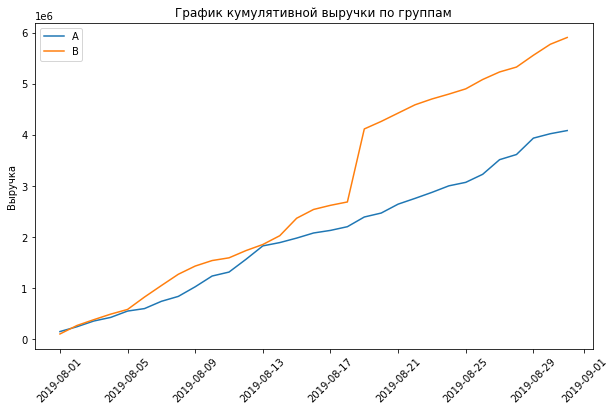

In [22]:
plt.figure(figsize=(10, 6))

# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# построим график выручки группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
# построим график выручки группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.legend()

По графику кумулятивной выручки по группам можно сделать следующие выводы:
- выручка в группе А возрастает линейно в течение анализируемого диапазона времени;
- выручка в группе B почти на всем периоде выше выручки в группе А. Происходит резкий скачок в середине периода, возможно связанный с аномалией.

По первому взгляду пользователи группы В приносят больше выручки пользователей группы А.

### Построение графика кумулятивного среднего чека по группам

Построим график кумулятивной среднего чека по группам, сделаем выводы и предположения

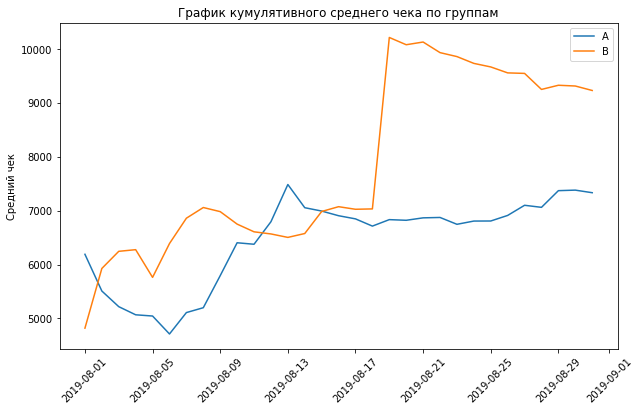

In [23]:
plt.figure(figsize=(10, 6))

# построим график среднего чека группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
# построим график среднего чека группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.legend()

По графику кумулятивного среднего чека по группам можно сделать следующие выводы:
- средний чек в группе А "плавает" в течение анализируемого диапазона времени и становится равномерным ближе к концу теста;
- средний чек в группе B растет скачками. Происходит резкий скачок в середине периода, возможно связанный с аномалией. Но после чего продолжает падать.

Необходимо провести анализ аномальных значений. По данному графику решение принимать нельзя

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A, сделаем выводы и предположения.

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

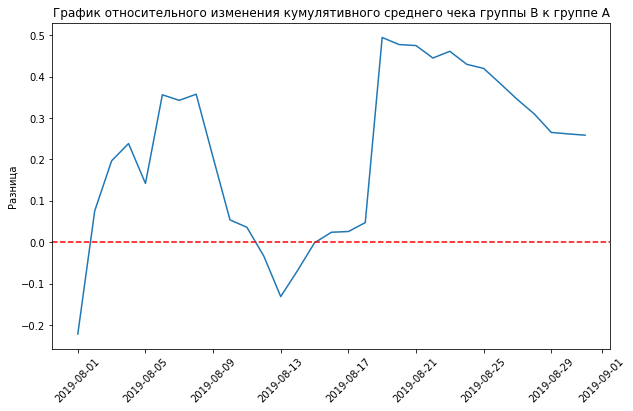

In [24]:
# соберем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', 
                                                       right_on='date', how='left', suffixes=['A', 'B'])

# построим отношение средних чеков
plt.figure(figsize=(10, 6))
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA']) - 1)

# добавим ось X
plt.axhline(y=0, color='red', linestyle='--')
plt.ylabel('Разница')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

По графику видно, что кумулятивный средний чек по группе B практически на протяжении всего теста находится значительно выше группы A. В нескольких точках график относительного изменения резко «скачет», видимо это влияние аномальных значений.

### Построение графика кумулятивной конверсии по группам

Построим график кумулятивной конверсии по группам, сделаем выводы и предположения.

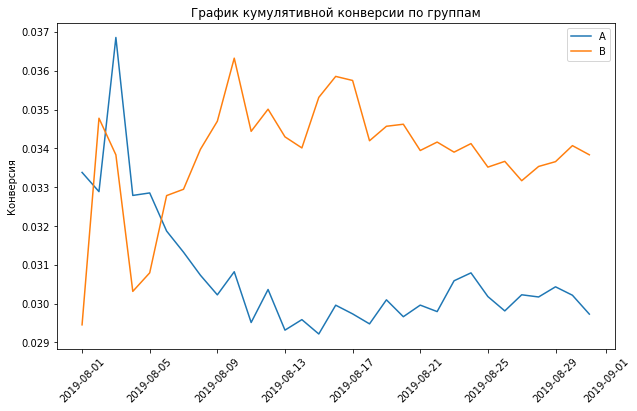

In [25]:
# посчитаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделим данные по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# отделим данные по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# построим графики
plt.figure(figsize=(10, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')

plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.title('График кумулятивной конверсии по группам')
plt.legend()

По графику кумулятивной конверсии по группам можно сделать следующие выводы:

- конверсия в группе А дает резкий скачок в начале теста, после чего идет хорошо видимое снижение;
- конверсия в группе B почти на всем периоде выше конверсии в группе А. Происходит резкий скачок в начале периода, далее идет относительно стабильное состояние.

Пока можно сказать, что у пользователей группы В кумулятивная конверсия лучше чем у пользователей группы А.

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A, сделаем выводы и предположения.

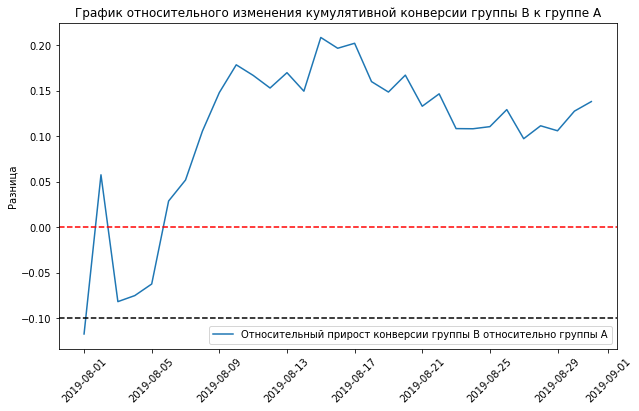

In [26]:
# соберем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(
    cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построим графики
plt.figure(figsize=(10, 6))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='black', linestyle='--')
plt.ylabel('Разница')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.legend()

По графику видно, что кумулятивная конверсия по группе B практически на протяжении всего теста находится значительно выше группы A и на конец теста находится в постепенно растущем состоянии. В начале теста график относительного изменения резко «скачет», видимо это влияние аномальных значений.

### Построение точечного графика количества заказов по пользователям

Построим точечный график количества заказов по пользователям, сделаем выводы и предположения.

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

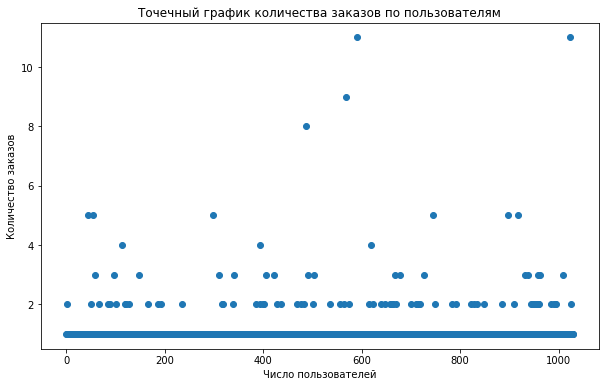

In [27]:
# Посчитаем количество заказов по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

# Построим точечный график числа заказов на пользователя
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_by_users['orders'])
plt.xlabel('Число пользователей')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям')

По точечному графику количества заказов по пользователям можно сделать следующие выводы:
- подавляющее большинство пользователей совершило по 1 заказу;
- более двух заказов совершают минимальное количество пользователей, скорее всего это будет 95 перцентиль;
- есть заказы более 10 раз, скорее всего это и есть аномалии.

### Подсчет 95-го и 99-го перцентиля количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя, выберем границу для определения аномальных пользователей.

In [28]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

- не более 5% пользователей оформляли больше чем 2 заказа. 
- не более 1% пользователей оформляли больше чем 4 заказа. Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построение точечного графика стоимости заказов

Построим точечный график стоимости заказов, сделаем выводы и предположения.

Text(0.5, 1.0, 'Точечный график стоимости заказов')

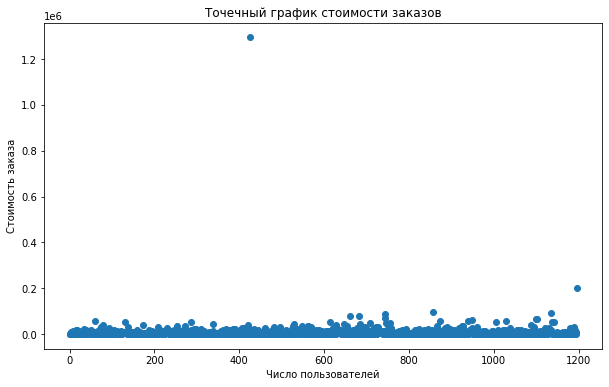

In [29]:
# Оценим стоимость закахов
x_values = pd.Series(range(0,len(orders['revenue'])))

# Построим точечный график стоимости заказов
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов')

На графике видно 2 выброса. Это скорее единичные крупные заказы в очень больших объемах.

(0.0, 100000.0)

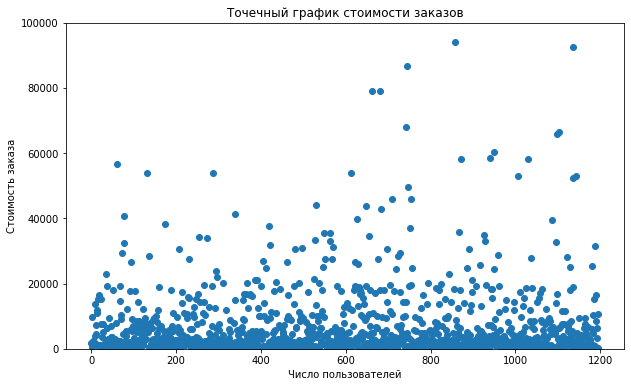

In [30]:
# Построим точечный график стоимости заказов при другом масштабировании для большей наглядности

plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов')
plt.ylim([0, 100000])

По точечному графику стоимости заказов можно сделать следующие выводы:

- подавляющее большинство пользователей тратит максимум до 20000;
- заказы на более 25000 совершают минимальное количество пользователей, скорее всего это будет 95 перцентиль;
- есть заказы более 1 миллиона, скорее всего это и есть аномалии.

### Подсчет 95-го и 99-го перцентиля стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов, выберем границу для определения аномальных заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

- не более 5% пользователей оформляли покупку более чем 28000. 
- не более 1% пользователей оформляли покупку более чем 58233.2. Разумно выбрать эту цифру за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

### Подсчет статистической значимости различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным, сделаем выводы и предположения.

Сформулируем гипотезы:

Н0: **различий в конверсии между группами по "сырым" данным нет**

Н1: **различия в конверсии между группами по "сырым" данным есть**

In [32]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_A_cummulative.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_B_cummulative.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

In [33]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitor_id', 'transaction_id']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitor_id', 'transaction_id']

sample_A = pd.concat(
    [
        orders_by_users_A['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sample_B = pd.concat(
    [
        orders_by_users_B['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

alpha = 0.05 
results = stats.mannwhitneyu(sample_A, sample_B)

p_value = results.pvalue

print('p-значение: ', "{0}".format(p_value))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Отношения средних B и A по конверсии по "сырым" данным:', "{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу
Отношения средних B и A по конверсии по "сырым" данным: 0.138


- Отвергаем нулевую гипотезу. **Различия в конверсии между группами по "сырым" данным есть.**
- Средняя конверсия группы В больше. Статистическая значимость присутствует.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, сделаем выводы и предположения.

Сформулируем гипотезы:

Н0: **различий в среднем чеке между группами по "сырым" данным нет**

Н1: **различия в среднем чеке между группами по "сырым" данным есть**

In [34]:
alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

p_value = results.pvalue

print('p-значение: ', "{0}".format(p_value))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Отношения средних B и A по среднему чеку по "сырым" данным:', "{0:.3f}"
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу
Отношения средних B и A по среднему чеку по "сырым" данным: 0.259


- Не получилось отвергнуть нулевую гипотезу. **Различий в среднем чеке между группами по "сырым" данным нет.**
- Средний чек группы В намного больше среднего чека группы А.

### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным, сделаем выводы и предположения.

Сформулируем гипотезы:

Н0: **различий в конверсии между группами по "очищенным" данным нет**

Н1: **различия в конверсии между группами по "очищенным" данным есть**

In [35]:
# Очистим данные и узнаем количество аномальных пользователей

users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['transaction_id'] > orders_by_users_A['transaction_id'].quantile(0.95)]['visitor_id'],
        orders_by_users_B[orders_by_users_B['transaction_id'] > orders_by_users_B['transaction_id'].quantile(0.95)]['visitor_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > orders['revenue'].quantile(0.95)]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users.shape[0]

74

In [36]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05 
results = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)

p_value = results.pvalue

print('p-значение: ', "{0}".format(p_value))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Отношения средних B и A по конверсии по "очищенным" данным:', "{0:.3f}"
      .format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p-значение:  0.013042592743036745
Отвергаем нулевую гипотезу
Отношения средних B и A по конверсии по "очищенным" данным: 0.173


- Количество аномальных пользователей - 74.
- Отвергаем нулевую гипотезу. **Различия в конверсии между группами по "очищенным" данным есть.**
- Средняя конверсия группы В больше. Статистическая значимость присутствует.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, сделаем выводы и предположения

Сформулируем гипотезы:

Н0: **различий в среднем чеке между группами по "очищенным" данным нет**

Н1: **различия в среднем чеке между группами по "очищенным" данным есть**

In [37]:
alpha = 0.05 
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )

p_value = results.pvalue

print('p-значение: ', "{0}".format(p_value))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Отношения средних B и A по среднему чеку по "очищенным" данным::',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.738481751314565
Не получилось отвергнуть нулевую гипотезу
Отношения средних B и A по среднему чеку по "очищенным" данным:: -0.020


- Не получилось отвергнуть нулевую гипотезу. **Различий в среднем чеке между группами по "очищенным" данным нет.**
- Средний чек группы В меньше среднего чека группы А. Аномально дорогие заказы повлияли на результаты теста.

### Принятие решения по результатам теста

Примем решение по результатам теста. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп;
2. Остановить тест, зафиксировать отсутствие различий между группами; 
3. Продолжить тест.

По проведенному анализу можно принять решение №1 **Остановить тест, зафиксировать победу одной из групп**.

Объясняется это тем, что конверсия группы B по "сырым" и "очищенным" данным выше группы А. Присутствует статистическая значимость.

По среднему чеку различий нет, но даже аномально дорогие заказы в группе B не сильно повлияли на принятие решения.

При учете ошибок, которые повлияли на результаты теста, предлагаю остановить тест и зафиксировать победу группы B.